In [5]:
import pandas as pd

# serenata-toolbox --module chamber_of_deputies --year 2019

# Para mostrar a url completa na coluna do documento
pd.set_option('max_colwidth', -1)

CSV_PATH = './data/reimbursements-2019.csv'
df = pd.read_csv(CSV_PATH)

/home/giovani/.pyenv/versions/jupyter3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (11,24,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# Separando as colunas de interesse

df = df[['congressperson_name', 'cpf', 'subquota_description', 'issue_date', 'total_net_value', 'urlDocumento', 'state']]

In [7]:
# Quais são as subquotas que podem ser utilizadas?

df['subquota_description'].unique()

array(['Telecommunication', 'Postal services', 'Flight ticket issue',
       'Publicity of parliamentary activity', 'Fuels and lubricants',
       'Maintenance of office supporting parliamentary activity',
       'Congressperson meal', 'Flight tickets', 'Taxi, toll and parking',
       'Consultancy, research and technical work',
       'Publication subscriptions',
       'Automotive vehicle renting or charter',
       'Security service provided by specialized company',
       'Lodging, except for congressperson from Distrito Federal',
       'Terrestrial, maritime and fluvial tickets',
       'Aircraft renting or charter of aircraft',
       'Participation in course, talk or similar event',
       'Watercraft renting or charter'], dtype=object)

In [8]:
MEAL_SUBQUOATA = 'Congressperson meal'
food_receipts = df[df['subquota_description'] == MEAL_SUBQUOATA]
food_receipts.shape

(15574, 7)

In [9]:
print(food_receipts['total_net_value'].max())
food_receipts[food_receipts['total_net_value'] == food_receipts['total_net_value'].max()]

8000.0


,congressperson_name,cpf,subquota_description,issue_date,total_net_value,urlDocumento,state
225341,PP,NaN,Congressperson meal,2019-11-07T23:00:00,8000.0,https://www.camara.leg.br/cota-parlamentar/documentos/publ/3461/2019/6959055.pdf,NaN


https://www.camara.leg.br/cota-parlamentar/documentos/publ/3461/2019/6959055.pdf
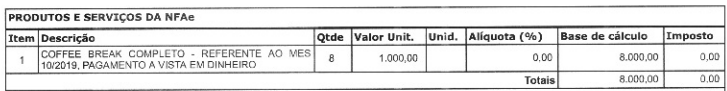

In [10]:
# Remoção das Lideranças

food_receipts = food_receipts[food_receipts['congressperson_name'].str.len() > 6].sort_values(by='total_net_value', ascending=False)
food_receipts.dropna(subset=['cpf'], inplace=True)

In [11]:
food_receipts.shape

(14983, 7)

In [12]:
food_receipts.head(10)[['congressperson_name', 'total_net_value', 'subquota_description', 'urlDocumento']]

,congressperson_name,total_net_value,subquota_description,urlDocumento
207203,ALEXANDRE FROTA,3283.00,Congressperson meal,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6933043
191657,ALEXANDRE FROTA,1855.90,Congressperson meal,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6911305
207919,RUBENS BUENO,1400.00,Congressperson meal,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6934052
160382,ALEXANDRE FROTA,1273.00,Congressperson meal,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6868145
116394,RUBENS BUENO,1262.00,Congressperson meal,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6807400
173408,RUBENS BUENO,1146.50,Congressperson meal,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6886112
111410,ALEXANDRE FROTA,958.10,Congressperson meal,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6800376
211733,BIA KICIS,921.90,Congressperson meal,https://www.camara.leg.br/cota-parlamentar/documentos/publ/3402/2019/6939207.pdf
99649,DR. JAZIEL,754.60,Congressperson meal,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6783480
98723,ANGELA AMIN,609.18,Congressperson meal,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6781969


In [13]:
# Vamos ver como estão os do Paraná

pr_food_receipts = food_receipts[food_receipts['state'] == 'PR']
pr_food_receipts.head(10)

,congressperson_name,cpf,subquota_description,issue_date,total_net_value,urlDocumento,state
207919,RUBENS BUENO,1.874642e+10,Congressperson meal,2019-10-02T00:00:00,1400.00,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6934052,PR
116394,RUBENS BUENO,1.874642e+10,Congressperson meal,2019-04-15T00:00:00,1262.00,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6807400,PR
173408,RUBENS BUENO,1.874642e+10,Congressperson meal,2019-08-04T00:00:00,1146.50,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6886112,PR
155847,RUBENS BUENO,1.874642e+10,Congressperson meal,2019-06-19T00:00:00,589.90,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6862157,PR
142104,RUBENS BUENO,1.874642e+10,Congressperson meal,2019-05-30T00:00:00,573.15,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6843629,PR
114029,VERMELHO,3.328696e+10,Congressperson meal,2019-04-01T00:00:00,368.38,https://www.camara.leg.br/cota-parlamentar/documentos/publ/3330/2019/6803949.pdf,PR
114018,VERMELHO,3.328696e+10,Congressperson meal,2019-03-31T00:00:00,345.04,https://www.camara.leg.br/cota-parlamentar/documentos/publ/3330/2019/6803937.pdf,PR
153315,ZECA DIRCEU,3.098872e+09,Congressperson meal,2019-06-12T00:00:00,239.75,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6858652,PR
133869,RUBENS BUENO,1.874642e+10,Congressperson meal,2019-05-21T00:00:00,221.60,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6831671,PR
114046,VERMELHO,3.328696e+10,Congressperson meal,2019-03-31T00:00:00,221.56,https://www.camara.leg.br/cota-parlamentar/documentos/publ/3330/2019/6803968.pdf,PR


https://perfil.parlametria.org/parlamentar/173466/cargos
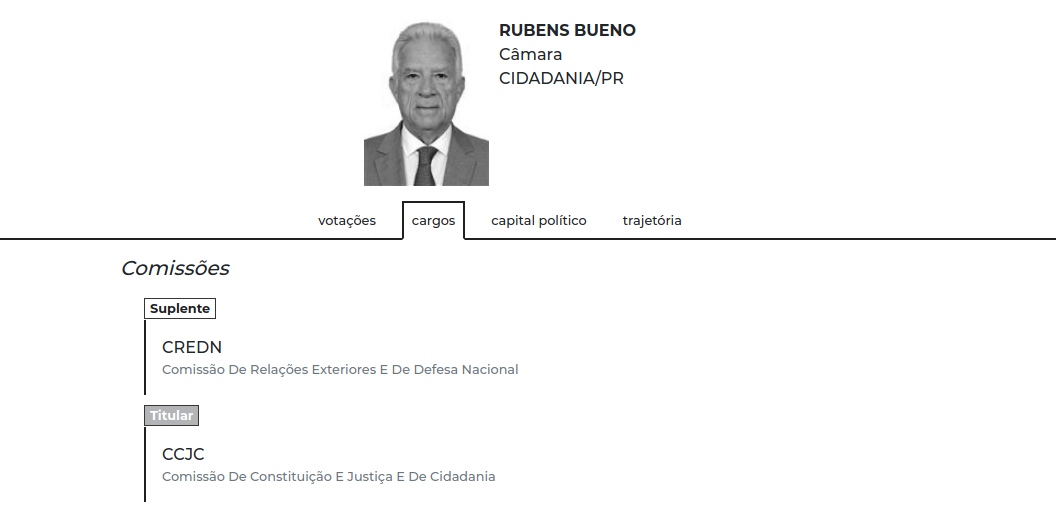

In [14]:
SUNDAY = 6
pr_food_receipts['issue_date_converted'] = pd.to_datetime(pr_food_receipts['issue_date'])
sunday_meals = pr_food_receipts[pr_food_receipts['issue_date_converted'].dt.dayofweek == SUNDAY]

/home/giovani/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
sunday_meals.head(10)

,congressperson_name,cpf,subquota_description,issue_date,total_net_value,urlDocumento,state,issue_date_converted
173408,RUBENS BUENO,1.874642e+10,Congressperson meal,2019-08-04T00:00:00,1146.50,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6886112,PR,2019-08-04 00:00:00
114018,VERMELHO,3.328696e+10,Congressperson meal,2019-03-31T00:00:00,345.04,https://www.camara.leg.br/cota-parlamentar/documentos/publ/3330/2019/6803937.pdf,PR,2019-03-31 00:00:00
114046,VERMELHO,3.328696e+10,Congressperson meal,2019-03-31T00:00:00,221.56,https://www.camara.leg.br/cota-parlamentar/documentos/publ/3330/2019/6803968.pdf,PR,2019-03-31 00:00:00
114082,VERMELHO,3.328696e+10,Congressperson meal,2019-03-31T00:00:00,203.10,https://www.camara.leg.br/cota-parlamentar/documentos/publ/3330/2019/6804011.pdf,PR,2019-03-31 00:00:00
188452,ZECA DIRCEU,3.098872e+09,Congressperson meal,2019-08-25T00:00:00,172.19,https://www.camara.leg.br/cota-parlamentar/documentos/publ/2238/2019/6907379.pdf,PR,2019-08-25 00:00:00
219951,LUISA CANZIANI,5.823530e+09,Congressperson meal,2019-10-27T23:00:00,168.00,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6951009,PR,2019-10-27 23:00:00
146163,SCHIAVINATO,2.769609e+10,Congressperson meal,2019-06-09T00:00:00,144.00,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6849170,PR,2019-06-09 00:00:00
86199,SCHIAVINATO,2.769609e+10,Congressperson meal,2019-02-10T00:00:00,139.97,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6762038,PR,2019-02-10 00:00:00
183511,ZECA DIRCEU,3.098872e+09,Congressperson meal,2019-08-11T00:00:00,131.60,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6900630,PR,2019-08-11 00:00:00
124854,FILIPE BARROS,5.825761e+09,Congressperson meal,2019-05-05T00:00:00,131.16,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6819428,PR,2019-05-05 00:00:00


# Fominha do Vermelho

https://www.facebook.com/deputadovermelho/photos/a.266261660208516/1343358402498831/?type=3&theater
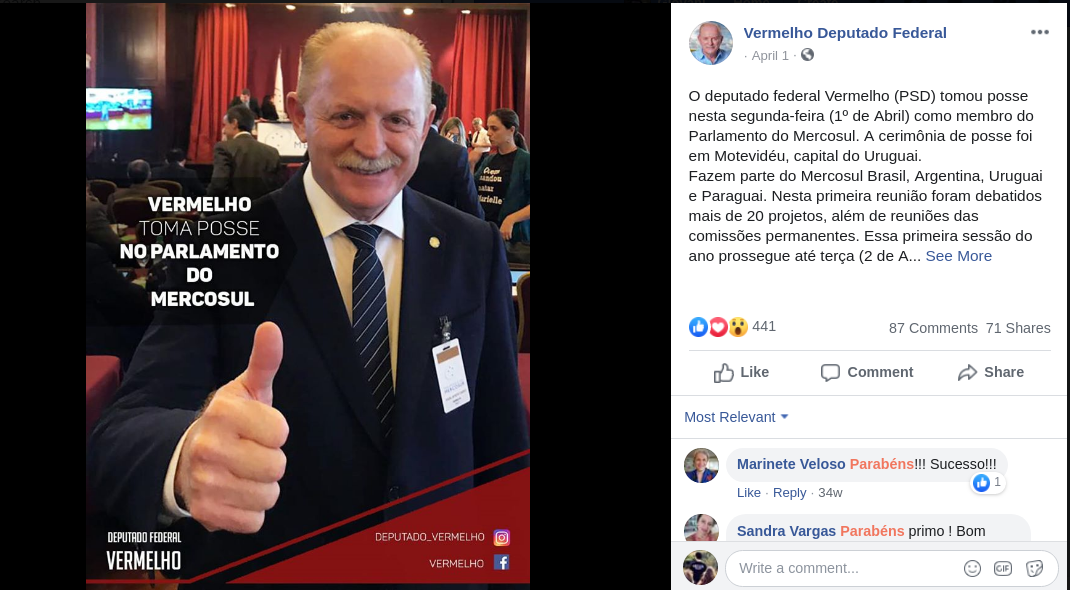

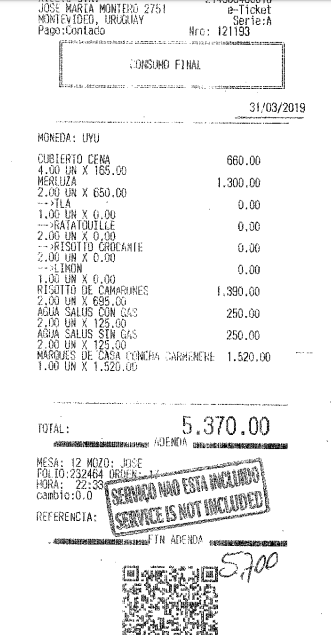

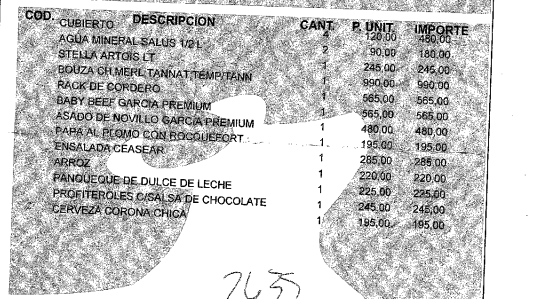

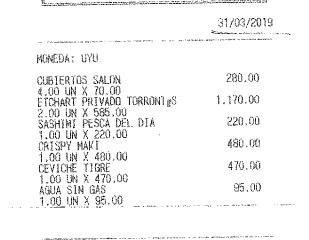

In [16]:
sunday_meals.head(10)

,congressperson_name,cpf,subquota_description,issue_date,total_net_value,urlDocumento,state,issue_date_converted
173408,RUBENS BUENO,1.874642e+10,Congressperson meal,2019-08-04T00:00:00,1146.50,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6886112,PR,2019-08-04 00:00:00
114018,VERMELHO,3.328696e+10,Congressperson meal,2019-03-31T00:00:00,345.04,https://www.camara.leg.br/cota-parlamentar/documentos/publ/3330/2019/6803937.pdf,PR,2019-03-31 00:00:00
114046,VERMELHO,3.328696e+10,Congressperson meal,2019-03-31T00:00:00,221.56,https://www.camara.leg.br/cota-parlamentar/documentos/publ/3330/2019/6803968.pdf,PR,2019-03-31 00:00:00
114082,VERMELHO,3.328696e+10,Congressperson meal,2019-03-31T00:00:00,203.10,https://www.camara.leg.br/cota-parlamentar/documentos/publ/3330/2019/6804011.pdf,PR,2019-03-31 00:00:00
188452,ZECA DIRCEU,3.098872e+09,Congressperson meal,2019-08-25T00:00:00,172.19,https://www.camara.leg.br/cota-parlamentar/documentos/publ/2238/2019/6907379.pdf,PR,2019-08-25 00:00:00
219951,LUISA CANZIANI,5.823530e+09,Congressperson meal,2019-10-27T23:00:00,168.00,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6951009,PR,2019-10-27 23:00:00
146163,SCHIAVINATO,2.769609e+10,Congressperson meal,2019-06-09T00:00:00,144.00,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6849170,PR,2019-06-09 00:00:00
86199,SCHIAVINATO,2.769609e+10,Congressperson meal,2019-02-10T00:00:00,139.97,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6762038,PR,2019-02-10 00:00:00
183511,ZECA DIRCEU,3.098872e+09,Congressperson meal,2019-08-11T00:00:00,131.60,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6900630,PR,2019-08-11 00:00:00
124854,FILIPE BARROS,5.825761e+09,Congressperson meal,2019-05-05T00:00:00,131.16,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6819428,PR,2019-05-05 00:00:00


# Fominha do SCHIAVINATO

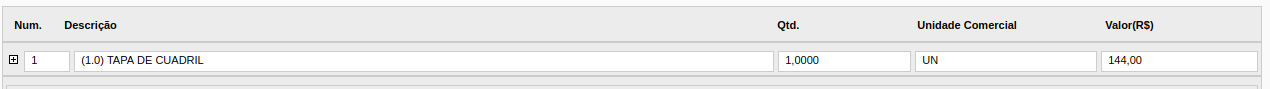

Domingo, 14hrs...
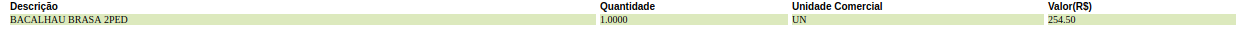

# Fominha do Zeca Dirceu

Não pagamos o cordeiro.... Estamos no lucro né?

http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6900630
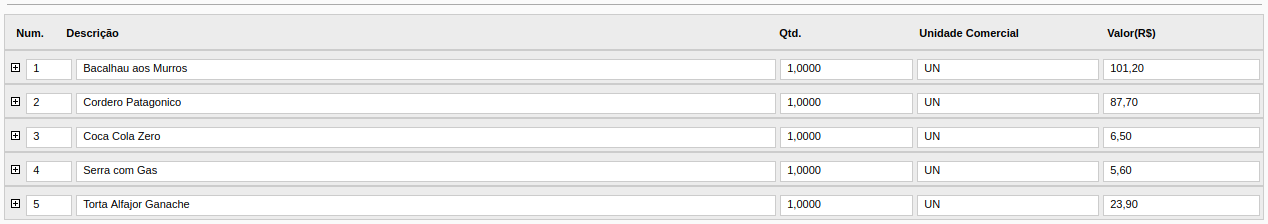

In [19]:
sunday_meals.head(10)

,congressperson_name,cpf,subquota_description,issue_date,total_net_value,urlDocumento,state,issue_date_converted
173408,RUBENS BUENO,1.874642e+10,Congressperson meal,2019-08-04T00:00:00,1146.50,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6886112,PR,2019-08-04 00:00:00
114018,VERMELHO,3.328696e+10,Congressperson meal,2019-03-31T00:00:00,345.04,https://www.camara.leg.br/cota-parlamentar/documentos/publ/3330/2019/6803937.pdf,PR,2019-03-31 00:00:00
114046,VERMELHO,3.328696e+10,Congressperson meal,2019-03-31T00:00:00,221.56,https://www.camara.leg.br/cota-parlamentar/documentos/publ/3330/2019/6803968.pdf,PR,2019-03-31 00:00:00
114082,VERMELHO,3.328696e+10,Congressperson meal,2019-03-31T00:00:00,203.10,https://www.camara.leg.br/cota-parlamentar/documentos/publ/3330/2019/6804011.pdf,PR,2019-03-31 00:00:00
188452,ZECA DIRCEU,3.098872e+09,Congressperson meal,2019-08-25T00:00:00,172.19,https://www.camara.leg.br/cota-parlamentar/documentos/publ/2238/2019/6907379.pdf,PR,2019-08-25 00:00:00
219951,LUISA CANZIANI,5.823530e+09,Congressperson meal,2019-10-27T23:00:00,168.00,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6951009,PR,2019-10-27 23:00:00
146163,SCHIAVINATO,2.769609e+10,Congressperson meal,2019-06-09T00:00:00,144.00,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6849170,PR,2019-06-09 00:00:00
86199,SCHIAVINATO,2.769609e+10,Congressperson meal,2019-02-10T00:00:00,139.97,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6762038,PR,2019-02-10 00:00:00
183511,ZECA DIRCEU,3.098872e+09,Congressperson meal,2019-08-11T00:00:00,131.60,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6900630,PR,2019-08-11 00:00:00
124854,FILIPE BARROS,5.825761e+09,Congressperson meal,2019-05-05T00:00:00,131.16,http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6819428,PR,2019-05-05 00:00:00


# Fominha do Filipe Barros
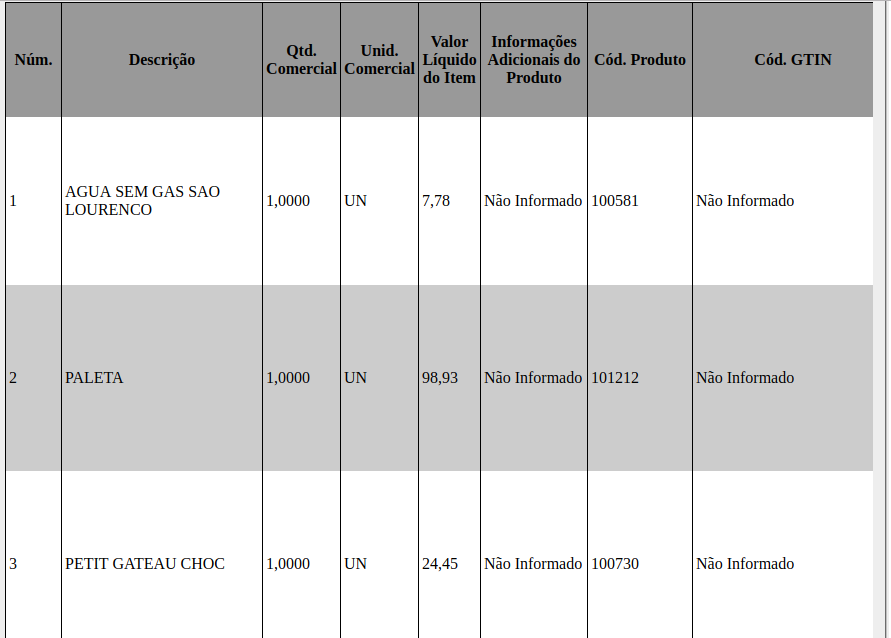